In [8]:
import numpy as np
import pandas as pd

# For reproducibility
np.random.seed(23)  

# Class 1 data
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.eye(3)  # same as [[1,0,0],[0,1,0],[0,0,1]]
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

# Class 2 data
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.eye(3)
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)
df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

# Combine datasets using pd.concat instead of deprecated append
df = pd.concat([df, df1], ignore_index=True)

# Shuffle rows reproducibly
df = df.sample(frac=1, random_state=23).reset_index(drop=True)

print(df)


    feature1  feature2  feature3  target
0  -0.331617 -1.632386  0.619114       1
1   1.010229  1.437830  2.327788       0
2   0.241106 -0.952510 -0.136267       1
3   1.676860  4.187503 -0.080565       0
4   2.823378 -0.332863  2.637391       0
5  -0.723253  1.461259 -0.085367       0
6   1.415320  0.457711  0.728876       1
7   1.772258 -0.347459  0.670140       1
8   0.420623  0.411620 -0.071324       1
9   1.437892  1.099723  1.065406       0
10  0.204637 -0.011535  3.150780       0
11  1.250737  0.186384  1.703624       0
12 -1.389866  0.666726  1.343517       0
13  0.322272  0.060343 -1.043450       1
14  1.045371  0.538162  0.812119       1
15  0.748855  2.593111  1.170818       0
16  0.948634  0.701672 -1.051082       1
17 -0.045438  1.040886 -0.094035       1
18 -1.027861  1.131416  2.603234       0
19 -0.420844 -0.551989 -0.121098       1
20  1.425140  1.441152  0.182561       0
21  0.666988  0.025813 -0.777619       1
22 -1.009942  0.441736  1.128877       1
23  0.731858  0.

In [9]:
import plotly.express as px
#y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'],
              color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.show()
     

In [10]:


# Step 1 - Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])
     

# Step 2 - Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n', covariance_matrix)
     


Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [ ]:

# Step 3 - Finding EV and EVs
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
     


/tmp/ipykernel_8170/3988530575.py:63: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_8170/3988530575.py:69: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_8170/3988530575.py:70: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipykernel_8170/3988530575.py:71: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (c

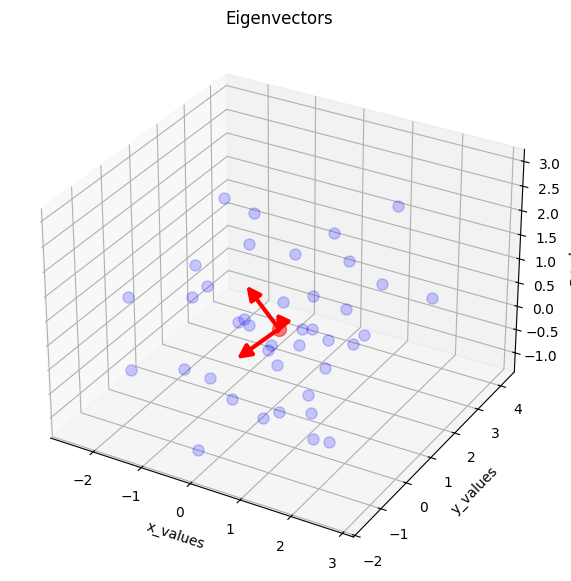

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

# -------------------------------
# Create dataset
# -------------------------------
np.random.seed(23)

mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.eye(3)
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)
df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1

mu_vec2 = np.array([1, 1, 1])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat1, 20)
df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)
df = df.sample(frac=1, random_state=23).reset_index(drop=True)

# -------------------------------
# Compute eigenvectors
# -------------------------------
cov_matrix = np.cov(df[['feature1', 'feature2', 'feature3']].T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# -------------------------------
# Arrow3D class with do_3d_projection fix
# -------------------------------
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        return np.min(zs)

# -------------------------------
# Plot
# -------------------------------
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Points
ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o',
        markersize=8, color='blue', alpha=0.2)

# Mean point
mean_vals = df[['feature1', 'feature2', 'feature3']].mean()
ax.plot([mean_vals[0]], [mean_vals[1]], [mean_vals[2]],
        'o', markersize=10, color='red', alpha=0.5)

# Eigenvector arrows
for v in eigen_vectors.T:
    arrow = Arrow3D(
        [mean_vals[0], mean_vals[0] + v[0]],
        [mean_vals[1], mean_vals[1] + v[1]],
        [mean_vals[2], mean_vals[2] + v[2]],
        mutation_scale=20, lw=3, arrowstyle="-|>", color="r"
    )
    ax.add_artist(arrow)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')
plt.show()


In [16]:


pc = eigen_vectors[0:2]
pc
     


array([[-0.61002583, -0.69239396,  0.3853039 ],
       [-0.53982115,  0.00718615, -0.84174906]])

In [17]:


transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# 40,3 - 3,2
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()
     


,PC1,PC2,target
0,1.571096,-0.353855,1
1,-0.714905,-2.494424,0
2,0.459927,-0.022297,1
3,-3.953371,-0.807297,0
4,-0.475664,-3.746533,0


In [18]:


new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()
     
